In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


matplotlib.use("Agg")  # noqa: E402

In [2]:
import numpy as np
##Read in the data sets needed. X_1 and X_2 are the training feature data for
##the GPs. Y_1 are the labels for the first GP regression (area estimates), Y_2 are the
##labels for the second GP regression (distance errors)
##########################
#Read in training data X_1, X_2
file_path = 'P14_GP_Training_Data_Features_X.txt'

X_1 = np.loadtxt(file_path)
X_2 = X_1
#########################
#Read in training labels Y_1 for the Area Growth Values Ag for the 100 tests
file_path = 'P14_GP_Training_Data_Labels_Y1.txt'

Y_1 = np.loadtxt(file_path)

##########################
#Read in training labels Y_2 for the Mean Distance Errors for the 100 tests
file_path = 'P14_GP_Training_Data_Labels_Y2.txt'

# Read the data from the file
Y_2 = np.loadtxt(file_path)

#############################
#Read in test data X_Test
file_path = 'P14_GP_Testing_Data_Features_X.txt'

X_test = np.loadtxt(file_path)
#############################
#Read in test data results Y_Test_1 for the area growth Ag
file_path = 'P14_GP_Testing_Data_Labels_Y1.txt'

Y_test_1 = np.loadtxt(file_path)
#############################
#Read in test data results Y_test_2 for the mean error
file_path = 'P14_GP_Testing_Data_Labels_Y2.txt'

Y_test_2 = np.loadtxt(file_path)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e10)) * RBF([1.0, 1.0, 1.0, 1.0, 1.0, 1.0], length_scale_bounds=(1e-2, 1e3))

# Create a Gaussian Process Regressor object
gp_1 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)

# Train the Gaussian Process Regressor
gp_1.fit(X_1, Y_1)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1, 1, 1, 1]),
                         n_restarts_optimizer=100)

[1279.68525901 1712.56875695   96.53667185 3140.68162434  619.21344587
 3267.91737909  553.38574541 2847.57607766 1955.5125526    61.69512032
 3907.93624733 3404.9298036   239.55244359 4197.7201333  2936.41581685
 3317.38157961  249.20003541 1105.32930644 4434.18563135 2334.50870873
 2795.66606385 1769.91002755 1300.58591962 1367.21408994  547.33524518
 3097.42834022]


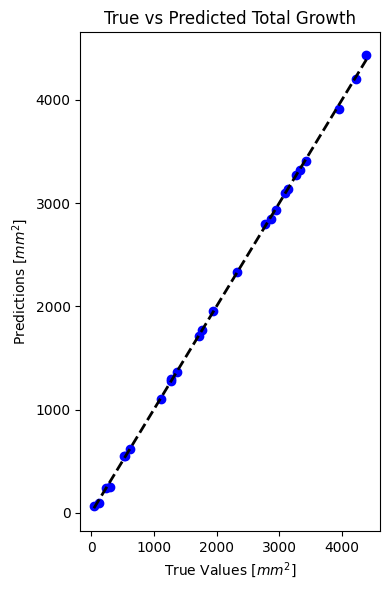

In [89]:
x_pred = X_test
#np.random.rand(100, 5)  # Generate new input data for prediction
y_pred, sigma = gp_1.predict(x_pred, return_std=True)
print(y_pred)
# Plot the results (since the output dimensionality is 1, it's difficult to visualize)
# Instead, you can plot the predicted values against the true values
plt.figure(figsize=(4, 6))
plt.scatter(Y_test_1, y_pred, color='blue')
plt.plot([Y_test_1.min(), Y_test_1.max()], [Y_test_1.min(), Y_test_1.max()], 'k--', lw=2)
plt.xlabel('True Values [$mm^2$]')
plt.ylabel('Predictions [$mm^2$]')
plt.title('True vs Predicted Total Growth')
plt.tight_layout()
plt.savefig("P14_GP1_performance.png", dpi=200)

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(Y_test_1, y_pred)

# Compute the root mean squared error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse} mm^2")

r_squared = r2_score(Y_test_1, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 22.306573141054017 mm^2
R-squared (R²): 0.9997220089357095


In [6]:
import time

# Assume you have a trained GaussianProcessRegressor object called 'gpr'
# And some input data 'X_test' for which you want to predict

# Start timing
start_time = time.time()

# Call the predict method
gp_1.predict(np.array([25.977, 14.9578, -76.340, 0.0506, 1.107, 0.0554]).reshape(1,-1))

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken to call .predict(): {elapsed_time} seconds")

Time taken to call .predict(): 0.0007185935974121094 seconds


In [7]:
# Create a Gaussian Process Regressor object
gp_2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the Gaussian Process Regressor
gp_2.fit(X_2, Y_2) #Train the GP on just tol, h, mu data

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1, 1, 1, 1]),
                         n_restarts_optimizer=10)

[1.70878    1.73413369 1.6391008  1.71869613 1.68780114 1.82181739
 1.74418049 1.70451565 1.9794317  1.8713579  1.5252848  1.87762407
 1.65120536 1.53034193 1.75796678 1.69534258 1.93993139 1.81411063
 1.85897527 1.61662505 2.14215473 1.8069996  1.98894068 1.64764945
 1.94819337 1.69436346]


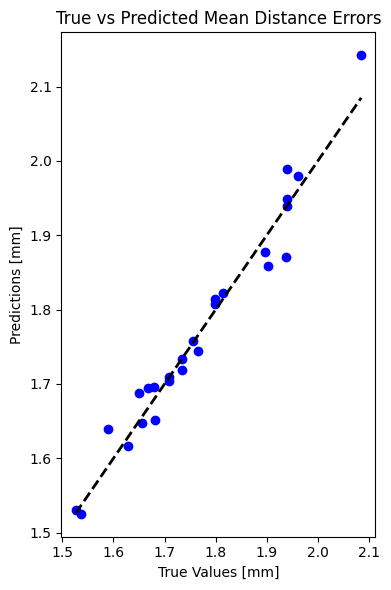

In [90]:
x_pred = X_test
#np.random.rand(100, 5)  # Generate new input data for prediction
y_pred_2, sigma = gp_2.predict(x_pred, return_std=True)
print(y_pred_2)
# Plot the results (since the output dimensionality is 1, it's difficult to visualize)
# Instead, you can plot the predicted values against the true values
plt.figure(figsize=(4, 6))
plt.scatter(Y_test_2, y_pred_2, color='blue')
plt.plot([Y_test_2.min(), Y_test_2.max()], [Y_test_2.min(), Y_test_2.max()], 'k--', lw=2)
plt.xlabel('True Values [mm]')
plt.ylabel('Predictions [mm]')
plt.title('True vs Predicted Mean Distance Errors')
plt.tight_layout()
plt.savefig("P14_GP2_performance.png", dpi=200)

In [9]:
mse = mean_squared_error(Y_test_2, y_pred_2)

# Compute the root mean squared error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse} mm")

r_squared = r2_score(Y_test_2, y_pred_2)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 0.027625197618088435 mm
R-squared (R²): 0.961726644244248


In [10]:
######## FIND MINIMUM OF GP2 ON INPUT SPACE FOR USE DURING MCMC
import numpy as np
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor

# Assuming you have a trained GaussianProcessRegressor model named 'gpr'
#tol_prior = uniform(loc=12, scale=25 - 12)
#h_prior = uniform(loc=2, scale=12 - 2)
#mu_prior = uniform(loc=0.0, scale = 1.0 - 0.0)
#Theta_crit_prior = uniform(loc=0.9, scale=2.2-0.9)
#kk_prior = kk_prior
# Define the bounds for the input variables, e.g., for a 2-dimensional input
bounds = [(X_1[:, 0].min(), X_1[:, 0].max()), 
          (X_1[:, 1].min(), X_1[:, 1].max()), 
          (X_1[:, 2].min(), X_1[:, 2].max()), 
          (X_1[:, 3].min(), X_1[:, 3].max()),
          (X_1[:, 4].min(), X_1[:, 4].max()),
          (X_1[:, 5].min(), X_1[:, 5].max())]  # Adding the sixth dimension

print(bounds)

# Define the objective function: the negative of the predicted mean
def objective_function(x):
    # Reshape x to be 2D array as expected by the predict method
    x = np.array(x).reshape(1, -1)
    # Predict the mean and standard deviation
    mean, std = gp_2.predict(x, return_std=True)
    # We want to minimize the mean, so return the negative mean
    return mean[0]

# Generate 100 random samples within the bounds
random_samples = np.array([np.random.uniform(low=b[0], high=b[1], size=1000) for b in bounds]).T

# Evaluate the objective function for each sample
objective_values = np.array([objective_function(sample) for sample in random_samples])

# Find the index of the minimum objective value
min_index = np.argmin(objective_values)

# Get the sample with the minimum objective value
best_sample = random_samples[min_index]

# Get the minimum prediction value
min_prediction_value = gp_2.predict(best_sample.reshape(1, -1))

print("Minimum prediction value:", min_prediction_value[0])
print("Input at minimum prediction value:", best_sample)

[(np.float64(17.008), np.float64(26.975)), (np.float64(8.041), np.float64(15.97)), (np.float64(-89.493), np.float64(4.924)), (np.float64(0.005), np.float64(0.997)), (np.float64(1.0), np.float64(1.396)), (np.float64(0.051), np.float64(0.25))]
Minimum prediction value: 1.4268593573719492
Input at minimum prediction value: [ 24.64564366  15.26720921 -84.54151885   0.16179465   1.01750442
   0.18055121]


In [6]:
##TEST PREDICTIONS FROM GPs
gp_2.predict(np.array([25.977, 14.9578, -76.340, 0.0506, 1.107, 0.0554]).reshape(1,-1))

NameError: name 'gp_2' is not defined

In [20]:
print(min(X_1[:,0]))

17.008


<built-in method min of numpy.ndarray object at 0x7f3f36c0b8d0>
[[0.04023017 0.03953454 0.03887439 ... 0.03524083 0.03582083 0.03644523]
 [0.03840605 0.03772308 0.03707555 ... 0.03338487 0.0339562  0.03457255]
 [0.03668794 0.03601648 0.03538046 ... 0.03161547 0.03217866 0.03278755]
 ...
 [0.03394158 0.03317907 0.03247437 ... 0.03431271 0.03479709 0.0353116 ]
 [0.03572902 0.03498569 0.0342996  ... 0.03617632 0.03665444 0.0371623 ]
 [0.03765414 0.0369297  0.03626177 ... 0.03816035 0.03863256 0.03913414]]


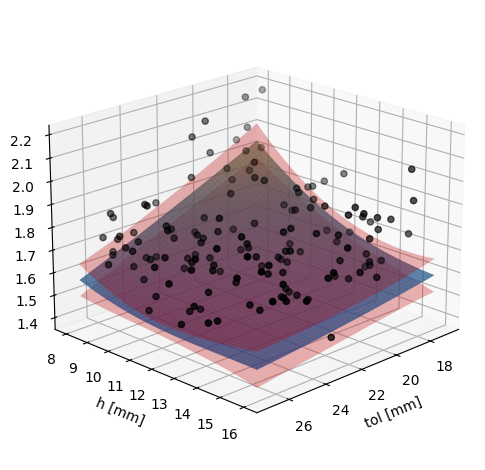

In [85]:
#Visualize GP2 output for tol and h inputs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume gp is your trained Gaussian Process model
# Fix three input features and vary two (say feature 1 and feature 2)
fixed_value_1 = -75
fixed_value_2 = 0.055
fixed_value_3 = 1.11
fixed_value_4 = 0.055
# Define the fixed values for the three other features
fixed_features = [fixed_value_1, fixed_value_2, fixed_value_3, fixed_value_4]

print(X_1[:,0].min)
# Create the grid for the two varying features (x1, x2)
x1 = np.linspace(min(X_1[:,0]), max(X_1[:,0]), 50)
x2 = np.linspace(min(X_1[:,1]), max(X_1[:,1]), 50)
X1, X2 = np.meshgrid(x1, x2)

# Create the input array by fixing the other features and varying x1 and x2
input_data = np.hstack([
    X1.reshape(-1, 1),
    X2.reshape(-1, 1),
    np.ones((X1.size, 1)) * fixed_features[0],  # Fixed feature 1
    np.ones((X1.size, 1)) * fixed_features[1],  # Fixed feature 2
    np.ones((X1.size, 1)) * fixed_features[2],   # Fixed feature 3
    np.ones((X1.size, 1)) * fixed_features[3]
])

# Predict using the Gaussian Process model
Y_pred, sigma = gp_2.predict(input_data, return_std=True)

# Reshape the predictions to match the grid
Y_pred = Y_pred.reshape(X1.shape)
sigma = sigma.reshape(X1.shape)
print(sigma)
# Compute the 95% confidence interval
lower_bound = Y_pred - 1.96 * sigma
upper_bound = Y_pred + 1.96 * sigma

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the mean prediction surface
ax.plot_surface(X1, X2, Y_pred, rstride=1, cstride=1, alpha=0.5, cmap='viridis', edgecolor='none')

# Plot the 95% confidence interval surfaces
ax.plot_surface(X1, X2, lower_bound, rstride=1, cstride=1, alpha=0.3, color='red', edgecolor='none')
ax.plot_surface(X1, X2, upper_bound, rstride=1, cstride=1, alpha=0.3, color='red', edgecolor='none')
# Plot the mean prediction surface
ax.plot_surface(X1, X2, Y_pred, rstride=1, cstride=1, alpha=0.5)

# Plot the training data points on top
# Assuming training_inputs is a (n_samples, 5) array with your original training data
training_inputs = X_1[:,0:2]  # Your 5-dimensional training data
training_outputs = Y_2  # Corresponding outputs 

ax.scatter(training_inputs[:,0], training_inputs[:,1], training_outputs, c='black')

# Set labels
ax.set_xlabel('tol [mm]')
ax.set_ylabel('h [mm]')
ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.savefig("P14_GP2_Surface.png")
plt.show()

<built-in method min of numpy.ndarray object at 0x7f3f376f71b0>
[1.         1.00808163 1.01616327 1.0242449  1.03232653 1.04040816
 1.0484898  1.05657143 1.06465306 1.07273469 1.08081633 1.08889796
 1.09697959 1.10506122 1.11314286 1.12122449 1.12930612 1.13738776
 1.14546939 1.15355102 1.16163265 1.16971429 1.17779592 1.18587755
 1.19395918 1.20204082 1.21012245 1.21820408 1.22628571 1.23436735
 1.24244898 1.25053061 1.25861224 1.26669388 1.27477551 1.28285714
 1.29093878 1.29902041 1.30710204 1.31518367 1.32326531 1.33134694
 1.33942857 1.3475102  1.35559184 1.36367347 1.3717551  1.37983673
 1.38791837 1.396     ]


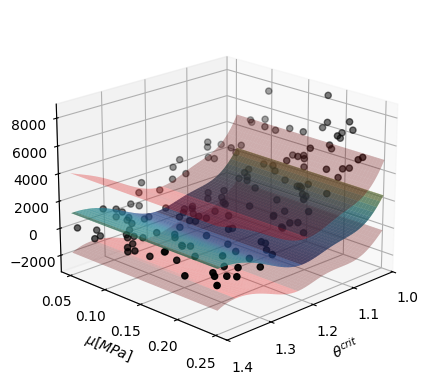

In [92]:
#Visualize GP1 output for mu and theta^crit inputs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume gp is your trained Gaussian Process model
# Fix three input features and vary two (say feature 1 and feature 2)
fixed_value_1 = 26
fixed_value_2 = 25
fixed_value_3 = -75
fixed_value_4 = 0.055
# Define the fixed values for the three other features
fixed_features = [fixed_value_1, fixed_value_2, fixed_value_3, fixed_value_4]

print(X_1[:,0].min)
# Create the grid for the two varying features (x1, x2)
x5 = np.linspace(min(X_1[:,4]), max(X_1[:,4]), 50)
x6 = np.linspace(min(X_1[:,5]), max(X_1[:,5]), 50)
print(x5)
X5, X6 = np.meshgrid(x5, x6)

# Create the input array by fixing the other features and varying x1 and x2
input_data = np.hstack([
    np.ones((X1.size, 1)) * fixed_features[0],  # Fixed feature 1
    np.ones((X1.size, 1)) * fixed_features[1],  # Fixed feature 2
    np.ones((X1.size, 1)) * fixed_features[2],   # Fixed feature 3
    np.ones((X1.size, 1)) * fixed_features[3],
    X5.reshape(-1, 1),
    X6.reshape(-1, 1),
])

# Predict using the Gaussian Process model
Y_pred, sigma = gp_1.predict(input_data, return_std=True)

# Reshape the predictions to match the grid
Y_pred = Y_pred.reshape(X1.shape)
sigma = sigma.reshape(X1.shape)

# Compute the 95% confidence interval
lower_bound = Y_pred - 1.96 * sigma
upper_bound = Y_pred + 1.96 * sigma

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the mean prediction surface
ax.plot_surface(X5, X6, Y_pred, rstride=1, cstride=1, alpha=0.5, cmap='viridis', edgecolor='none')

# Plot the 95% confidence interval surfaces
ax.plot_surface(X5, X6, lower_bound, rstride=1, cstride=1, alpha=0.3, color='red', edgecolor='none')
ax.plot_surface(X5, X6, upper_bound, rstride=1, cstride=1, alpha=0.3, color='red', edgecolor='none')
# Plot the mean prediction surface
ax.plot_surface(X5, X6, Y_pred, rstride=1, cstride=1, alpha=0.5)

# Plot the training data points on top
# Assuming training_inputs is a (n_samples, 5) array with your original training data
training_inputs = X_1[:,4:7]  # Your 5-dimensional training data
training_outputs = Y_1  # Corresponding outputs 

ax.scatter(training_inputs[:,0], training_inputs[:,1], training_outputs, c='black')

# Set labels
ax.set_xlabel(r'$\theta^{crit}$')
ax.set_xlim([1.0, 1.4])

ax.set_ylabel(r'$\mu [MPa]$')
ax.view_init(elev=20, azim=45)
ax.set_xticks([1.0, 1.1, 1.2, 1.3, 1.4])
plt.savefig("P14_GP1_Surface.png")
plt.show()

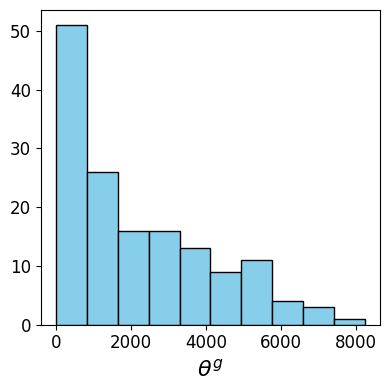

In [87]:
#Create growth histogram
import matplotlib.pyplot as plt

# Replace this with your actual dataset
data = Y_1  # Example data

plt.figure(figsize=(4, 4))  # Set the figure size to keep proportions similar
plt.hist(data, bins=10, color='skyblue', edgecolor='black')

# Customize the plot to match the style
plt.xlabel(r'$\theta^g$', fontsize=16)  # Set the x-axis label with LaTeX formatting
plt.xticks(fontsize=12)  # Set the font size for x-ticks
plt.yticks(fontsize=12)  # Set the font size for y-ticks
plt.tight_layout()  # Adjust layout to fit everything nicely

# Save or display the figure
plt.savefig("Growth_histogram.png", dpi=300)  # Save the image if needed
plt.show()

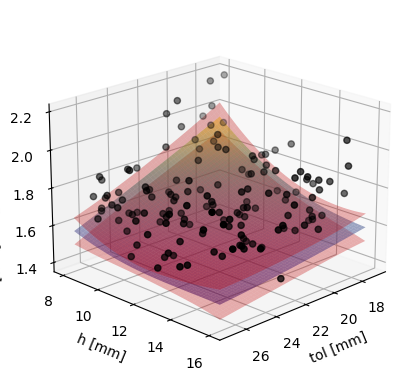

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Number of Monte Carlo samples for fixed features
n_samples = 1000

# Assume these are the ranges or standard deviations for the fixed features
fixed_value_1_range = [-80, -70]  # Range or standard deviation for fixed_value_1
fixed_value_2_range = [0.05, 0.06]  # Range or standard deviation for fixed_value_2
fixed_value_3_range = [1.1, 1.12]   # Range or standard deviation for fixed_value_3
fixed_value_4_range = [0.05, 0.06]  # Range or standard deviation for fixed_value_4

# Create the grid for the two varying features (x1, x2)
x1 = np.linspace(min(X_1[:, 0]), max(X_1[:, 0]), 50)
x2 = np.linspace(min(X_1[:, 1]), max(X_1[:, 1]), 50)
X1, X2 = np.meshgrid(x1, x2)

# Initialize arrays to hold the mean and sigma over all samples
Y_pred_total = np.zeros(X1.shape)
sigma_total = np.zeros(X1.shape)

# Monte Carlo sampling of fixed features
for _ in range(n_samples):
    # Randomly sample the fixed features within their ranges
    fixed_value_1 = np.random.uniform(fixed_value_1_range[0], fixed_value_1_range[1])
    fixed_value_2 = np.random.uniform(fixed_value_2_range[0], fixed_value_2_range[1])
    fixed_value_3 = np.random.uniform(fixed_value_3_range[0], fixed_value_3_range[1])
    fixed_value_4 = np.random.uniform(fixed_value_4_range[0], fixed_value_4_range[1])

    # Create the input array for the current sample
    input_data = np.hstack([
        X1.reshape(-1, 1),
        X2.reshape(-1, 1),
        np.ones((X1.size, 1)) * fixed_value_1,
        np.ones((X1.size, 1)) * fixed_value_2,
        np.ones((X1.size, 1)) * fixed_value_3,
        np.ones((X1.size, 1)) * fixed_value_4
    ])

    # Predict using the Gaussian Process model
    Y_pred_sample, sigma_sample = gp_2.predict(input_data, return_std=True)

    # Reshape the predictions to match the grid
    Y_pred_sample = Y_pred_sample.reshape(X1.shape)
    sigma_sample = sigma_sample.reshape(X1.shape)

    # Accumulate the predictions and standard deviations
    Y_pred_total += Y_pred_sample
    sigma_total += sigma_sample

# Compute the average prediction and sigma over all samples
Y_pred_avg = Y_pred_total / n_samples
sigma_avg = sigma_total / n_samples

# Compute the 95% confidence interval
lower_bound = Y_pred_avg - 1.96 * sigma_avg
upper_bound = Y_pred_avg + 1.96 * sigma_avg

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the mean prediction surface
ax.plot_surface(X1, X2, Y_pred_avg, rstride=1, cstride=1, alpha=0.5, cmap='viridis', edgecolor='none')

# Plot the 95% confidence interval surfaces
ax.plot_surface(X1, X2, lower_bound, rstride=1, cstride=1, alpha=0.3, color='red', edgecolor='none')
ax.plot_surface(X1, X2, upper_bound, rstride=1, cstride=1, alpha=0.3, color='red', edgecolor='none')

# Plot the training data points on top
training_inputs = X_1[:, 0:2]  # Assuming X_1 contains the input features
training_outputs = Y_2  # Corresponding outputs

ax.scatter(training_inputs[:, 0], training_inputs[:, 1], training_outputs, c='black')

# Set labels
ax.set_xlabel('tol [mm]')
ax.set_ylabel('h [mm]')
ax.set_zlabel('Mean Distance Error [mm]')
ax.view_init(elev=20, azim=45)

plt.show()

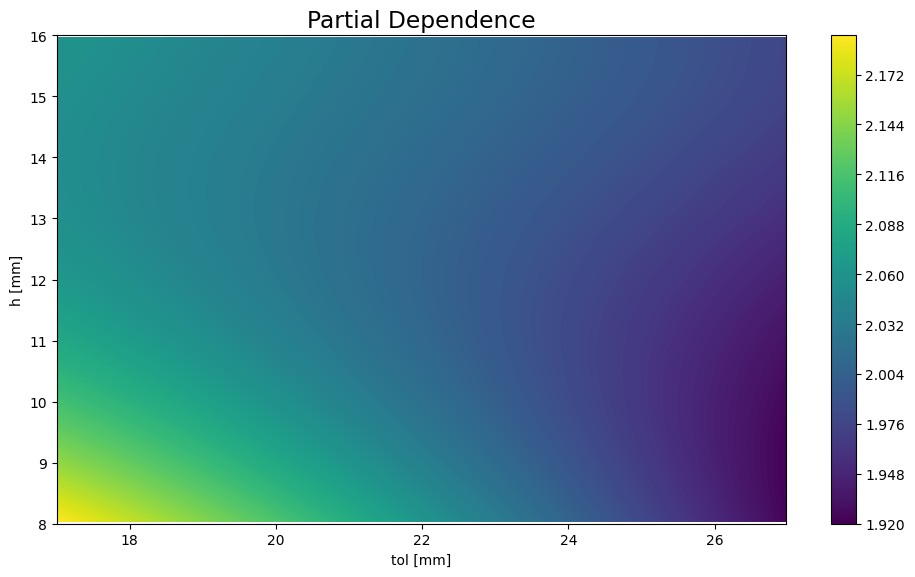

In [23]:
##VISUALIZE GP PARTIAL DEPENDENCE
# Specify the grid resolution for the contour plot
grid_points = 100  # Increase this number for more contours

# Create a meshgrid for the first two dimensions (assuming they are at indices 0 and 1)
x_range = np.linspace(X_2[:, 0].min(), X_2[:, 0].max(), grid_points)
y_range = np.linspace(X_2[:, 1].min(), X_2[:, 1].max(), grid_points)
xx, yy = np.meshgrid(x_range, y_range)

# Set fixed values for the additional inputs
fixed_input1 = -14  # For the third input
fixed_input2 = 0.0   # For the fourth input
fixed_input3 = 1.12
fixed_input4 = 0.15

# Create a new dataset for the contour with fixed inputs
grid_data = np.array([[x, y, fixed_input1, fixed_input2, fixed_input3, fixed_input4] for x, y in zip(xx.flatten(), yy.flatten())])

# Calculate partial dependence values for the grid
partial_dep_values = gp_2.predict(grid_data)

# Create the partial dependence plot
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(xx.flatten(), yy.flatten(), partial_dep_values, cmap='viridis', levels=150)  # Adjust levels for more contours
plt.colorbar(contour)

plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('h [mm]')
plt.title('Partial Dependence')
plt.ylim([8, 16])
plt.tight_layout()
plt.show()

In [24]:
pip install emcee

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


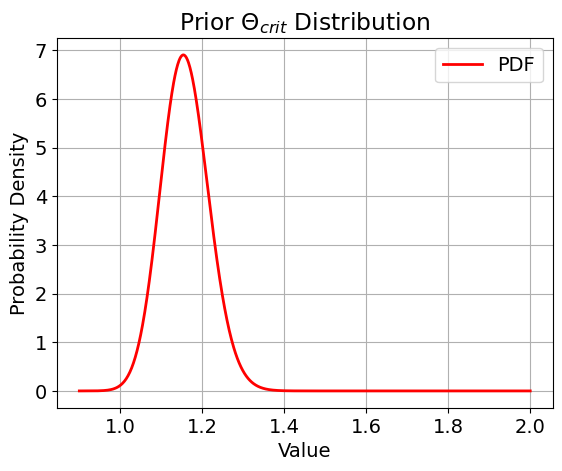

In [25]:
from scipy.stats import lognorm

# Define parameters for the log-normal distribution
mean = 1.1567  # Mean of the distribution
sigma = 0.05  # Standard deviation of the logarithm of the distribution

# Create a log-normal distribution object
Theta_crit_prior = lognorm(s=sigma, scale=mean)
x = np.linspace(0.9, 2, 1000)
pdf = Theta_crit_prior.pdf(x)
plt.plot(x, pdf, 'r-', lw=2, label='PDF')

plt.title('Prior $\Theta_{{crit}}$ Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#code to fix how the gmm pdf evaluates probability densities
def extract_first_item(obj):
    if isinstance(obj, np.ndarray) and obj.size > 0:
        return obj[0]
    else:
        return obj

In [27]:

import warnings
import numpy as np
import emcee
import corner

#Add uncertainty in initial stretch Theta_init
from scipy.stats import uniform
Theta_init = uniform(loc=1.025,scale=1.075-1.025)

# Filter out runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


# Function to compute likelihood
def likelihood(X, y, f):
    sigma_1 = 127 #Area measurement uncertainty for area gp -> 127 is +- 2.5 cm^2 uncertainty
    sigma_2 = 0.142848025/8 #Error Data Variance
    err_min = 1.4271916614143088 #min value of error GP on the input space
    
    theta_init = Theta_init.rvs(1)
    y_pred, err_pred = f(X)  # Predicted output from the function f
    
    
    # Assuming Gaussian likelihood
    likelihood = (1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((y_pred/theta_init - y)**2)/(sigma_1**2))) * (1/(sigma_2*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((err_pred-err_min)**2)/(sigma_2**2))),   # Likelihood function with both Growth and Error Components
    return likelihood

# Function to compute log posterior
def log_posterior(X, y, f, prior_distributions):
    # Prior probabilities for each input variable in X

    prior_probs = [extract_first_item(prior.pdf(x)) for prior, x in zip(prior_distributions, X)]

    # Compute the likelihood
    likelihood_val = likelihood(X, y, f)
    # Compute the log posterior
    log_posterior_val = np.sum(np.log(prior_probs)) + np.log(likelihood_val)

    return log_posterior_val

# Define your function f that maps inputs X to output y
def f(X):

    y_pred = gp_1.predict(X.reshape(1, -1))
    err_pred = gp_2.predict(X.reshape(1, -1))
    return y_pred, err_pred

from scipy.stats import uniform
from scipy.stats import norm

#Define priors to be just inside the bounds of the training data
tol_prior = uniform(loc=18, scale=26 - 18)
h_prior = uniform(loc=9.0, scale=15.0 - 9.0)
Gamma_prior = uniform(loc=-88.0, scale = 3.0 + 88.0)
Sx_prior = uniform(loc=0.05, scale=0.95 - 0.05)
Theta_crit_prior = uniform(loc=1.05, scale=1.35 - 1.05)
mu_prior = uniform(loc=0.055, scale=0.245 - 0.055)

prior_distributions = [tol_prior, h_prior, Gamma_prior, Sx_prior, Theta_crit_prior, mu_prior]

# Define the measured output y
y_observed = 2052.22 #True Growth measured [mm^2]

# Initialize MCMC sampler
nwalkers = 150  # Number of walkers
ndim = 6  # Dimensionality of the parameter space
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(y_observed, f, prior_distributions))

# Run MCMC sampling
nsteps = 30000  # Number of MCMC steps
# Generate random numbers for each column
column1 = np.random.uniform(18, 26, 150)
column2 = np.random.uniform(9, 15.0, 150)
column3 = np.random.uniform(-88.0, 3.0, 150)
column4 = np.random.uniform(0.05, 0.95, 150)
column5 = np.random.uniform(1.05, 1.35, 150)
column6 = np.random.uniform(0.055, 0.245, 150)

# Stack the columns horizontally to create the array

array = np.column_stack((column1, column2, column3, column4, column5, column6))

# Repeat the vector 100 times
initial_positions = array # Initial positions for walkers
step_count = 0

while step_count < nsteps:
    # Run MCMC for a subset of steps
    sampler.run_mcmc(initial_positions, nsteps=1000)


    # Increment step count
    step_count += 1000

    # You can perform any desired operations or monitoring here
    # Example: Print the current step count every 100 steps
    print(f"Completed {step_count} steps out of {nsteps}")

#Define a sample thinning factor
thin_factor = 10
    
# Extract samples from the sampler
samples = sampler.chain[:, 2000::thin_factor, :].reshape((-1, ndim))

# Extract samples from the sampler
pair_plot_samples = sampler.get_chain(flat=True)

# Create a pair plot
fig = corner.corner(samples, labels=["tol [mm]", "h [mm]", "$\gamma$", "$S_{{x}}$", "$\theta^{crit}$", "$\mu$ [MPa]"],
                    truths=[None, None, None, None, None, None])

# Show the plot
plt.show()
np.median(samples[:,3])
np.mean(samples[:,3])

emcee: Exception while calling your likelihood function:
  params: [ 25.23383666  13.06382592 -66.10375486   0.22495029   1.13409755
   0.07981268]
  args: (2052.22, <function f at 0x7ff3f1e22af0>, [<scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff3f1ea9f70>, <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff3f1e99f70>, <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff3f1d8b3a0>, <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff3f2194df0>, <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff3f1f42e50>, <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff3f2194bb0>])
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/home/jlaudo/.local/lib/python3.9/site-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/tmp/ipykernel_435027/940336640.py", line 32, in log_posterior
    prior_probs = [extract_first_item(prior.pdf(x)) for prior, x in zip(prior_distributions, X)]
  File "/tmp/ipykernel_435027/940336640.py", line 32, in <listcomp>
    prior_probs = [extract_first_item(prior.pdf(x)) for prior, x in zip(prior_distributions, X)]
  File "/home/jlaudo/.local/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py", line 555, in pdf
    return self.dist.pdf(x, *self.args, **self.kwds)
  File "/home/jlaudo/.local/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py", line 1995, in pdf
    goodargs = argsreduce(cond, *((x,)+args+(scale,)))
  File "/home/jlaudo/.local/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py", line 606, in argsreduce
    *newargs, cond = np.broadcast_

KeyboardInterrupt: 

In [ ]:
# Create a pair plot
fig = corner.corner(pair_plot_samples, labels=["tol [mm]", "h [mm]", "$\gamma$", "$S_{{x}}$", "$\theta^{crit}$", "$\mu$ [MPa]"],
                    truths=[None, None, None, None, None, None])

# Show the plot
plt.show()

In [41]:
# Redefine Function to compute log posterior here
def log_posterior(X, y, f, prior_distributions):
    # Prior probabilities for each input variable in X

    prior_probs = [extract_first_item(prior.pdf(x)) for prior, x in zip(prior_distributions, X)]

    # Compute the likelihood
    likelihood_val = likelihood(X, y, f)
    # Compute the log posterior
    log_posterior_val = np.sum(np.log(prior_probs)) + np.log(likelihood_val)

    return log_posterior_val

##########Compute the MAP estimate
log_posterior_values = []
# Calculate the log-posterior for each multivariate sample
for i in range(len(samples)):
    log_posterior_value = log_posterior(np.array(samples[i, :]), y_observed, f, prior_distributions)
    log_posterior_values.append(log_posterior_value)
    
# Find the index of the sample with the maximum log-posterior value
map_index = np.argmax(log_posterior_values)

# The MAP estimate is the sample with the highest log-posterior
map_estimate = samples[map_index]

print("MAP estimate:", map_estimate)

MAP estimate: [ 2.59769675e+01  1.49577896e+01 -7.63402865e+01  5.05622425e-02
  1.10666545e+00  5.53709254e-02]


In [38]:
from scipy.stats import uniform
Theta_init = uniform(loc=1.025,scale=1.075-1.025)

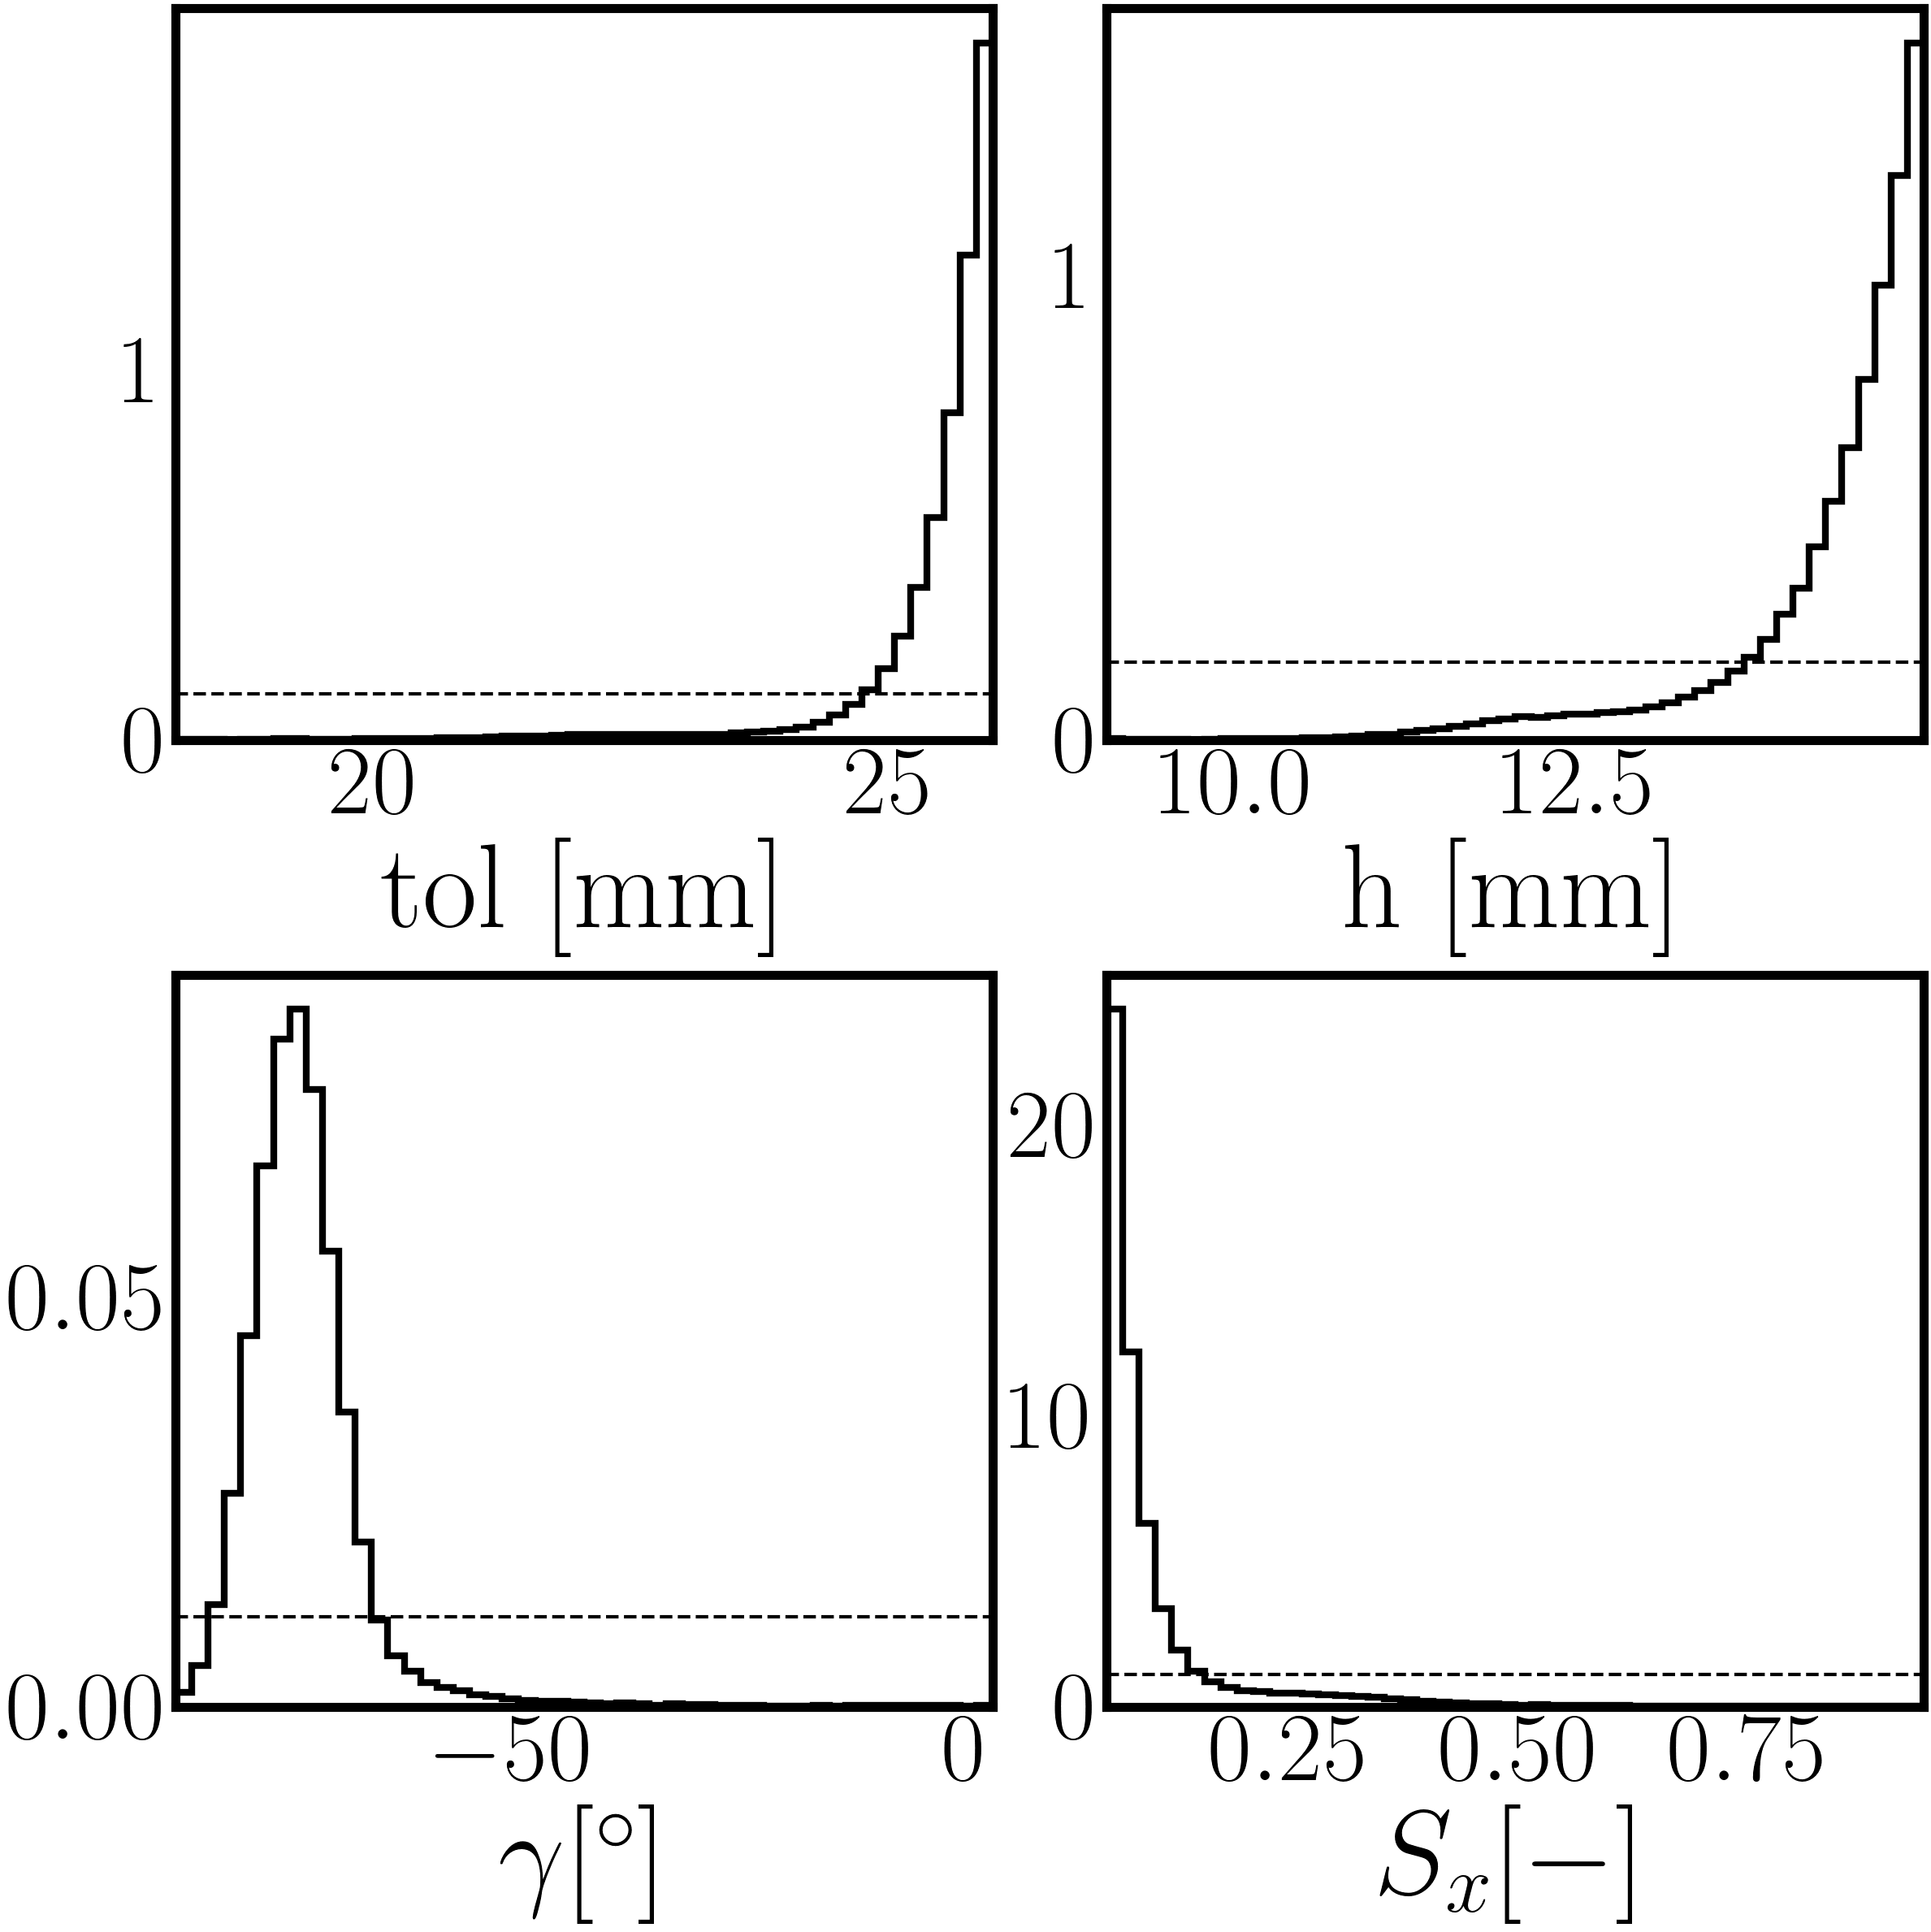

In [36]:
tol_prior = uniform(loc=18, scale=26 - 18)
h_prior = uniform(loc=9.0, scale=15.0 - 9.0)
Gamma_prior = uniform(loc=-88.0, scale = 3.0 + 88.0)
Sx_prior = uniform(loc=0.05, scale=0.95 - 0.05)
Theta_crit_prior = uniform(loc=1.05, scale=1.35 - 1.05)
mu_prior = uniform(loc=0.055, scale=0.245 - 0.055)





prior_distributions = [tol_prior, h_prior, Gamma_prior, Sx_prior]

posterior_samples = samples
priors = [prior for prior in prior_distributions]

# Define labels
labels = ["tol [mm]", "h [mm]", "$\\gamma [^\circ]$", "$S_{{x}}$", "$\theta^{crit}$", "$\mu$ [MPa]"]

# Set up font properties
label_font_properties = {'fontsize': 106, 'fontweight': 'bold'}  # Increase the font size
tick_font_properties = {'fontsize': 86, 'fontweight': 'bold'}  # Increase the font size for ticks
plt.rc('text', usetex=True)
# Create a single figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(24, 36))  # Adjust the size as needed

# Manually assign the subplots to match the required order
plot_positions = {
    "tol [mm]": (0, 0),
    "h [mm]": (0, 1),
    "$\\gamma [^\circ]$": (0, 2),
    "$S_x [-]$": (1, 0),
    "$\theta^{crit}$": (1, 1),
    "$\mu$ [MPa]": (1, 2)
}

# Loop through each parameter and create a subplot in the specified order
for i, label in enumerate(labels):
    row, col = plot_positions[label]
    ax = axes[row, col]

    # Plot the histogram of the posterior samples
    ax.hist(posterior_samples[:, i], bins=50, density=True, color='k', histtype='step', linewidth=6)

    # Define the x range for plotting the prior
    x_min, x_max = posterior_samples[:, i].min(), posterior_samples[:, i].max()
    x = np.linspace(x_min, x_max, 1000)

    # Calculate and plot the prior distribution
    y = priors[i].pdf(x)
    ax.plot(x, y, color='k', linestyle='--', linewidth=3.0)

    # Set the x limits to the data range
    ax.set_xlim(x_min, x_max)

    # Set the labels and title
    ax.set_xlabel(label, label_font_properties)


    # Set the linewidth of the plot border
    for spine in ax.spines.values():
        spine.set_linewidth(8)

    # Apply the font properties to the ticks
    ax.tick_params(axis='both', which='major', labelsize=tick_font_properties['fontsize'], width=2)  # Adjust the size as needed
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(tick_font_properties['fontsize'])  # Adjust the size as needed
        tick.set_fontweight(tick_font_properties['fontweight'])

# Adjust layout for better spacing


plt.tight_layout()
# Save the figure with 200 dpi resolution
fig.savefig('P14_marginal_plots.png', dpi=200, bbox_inches='tight')
plt.show()
# Close the figure to free up memory
plt.close(fig)

18


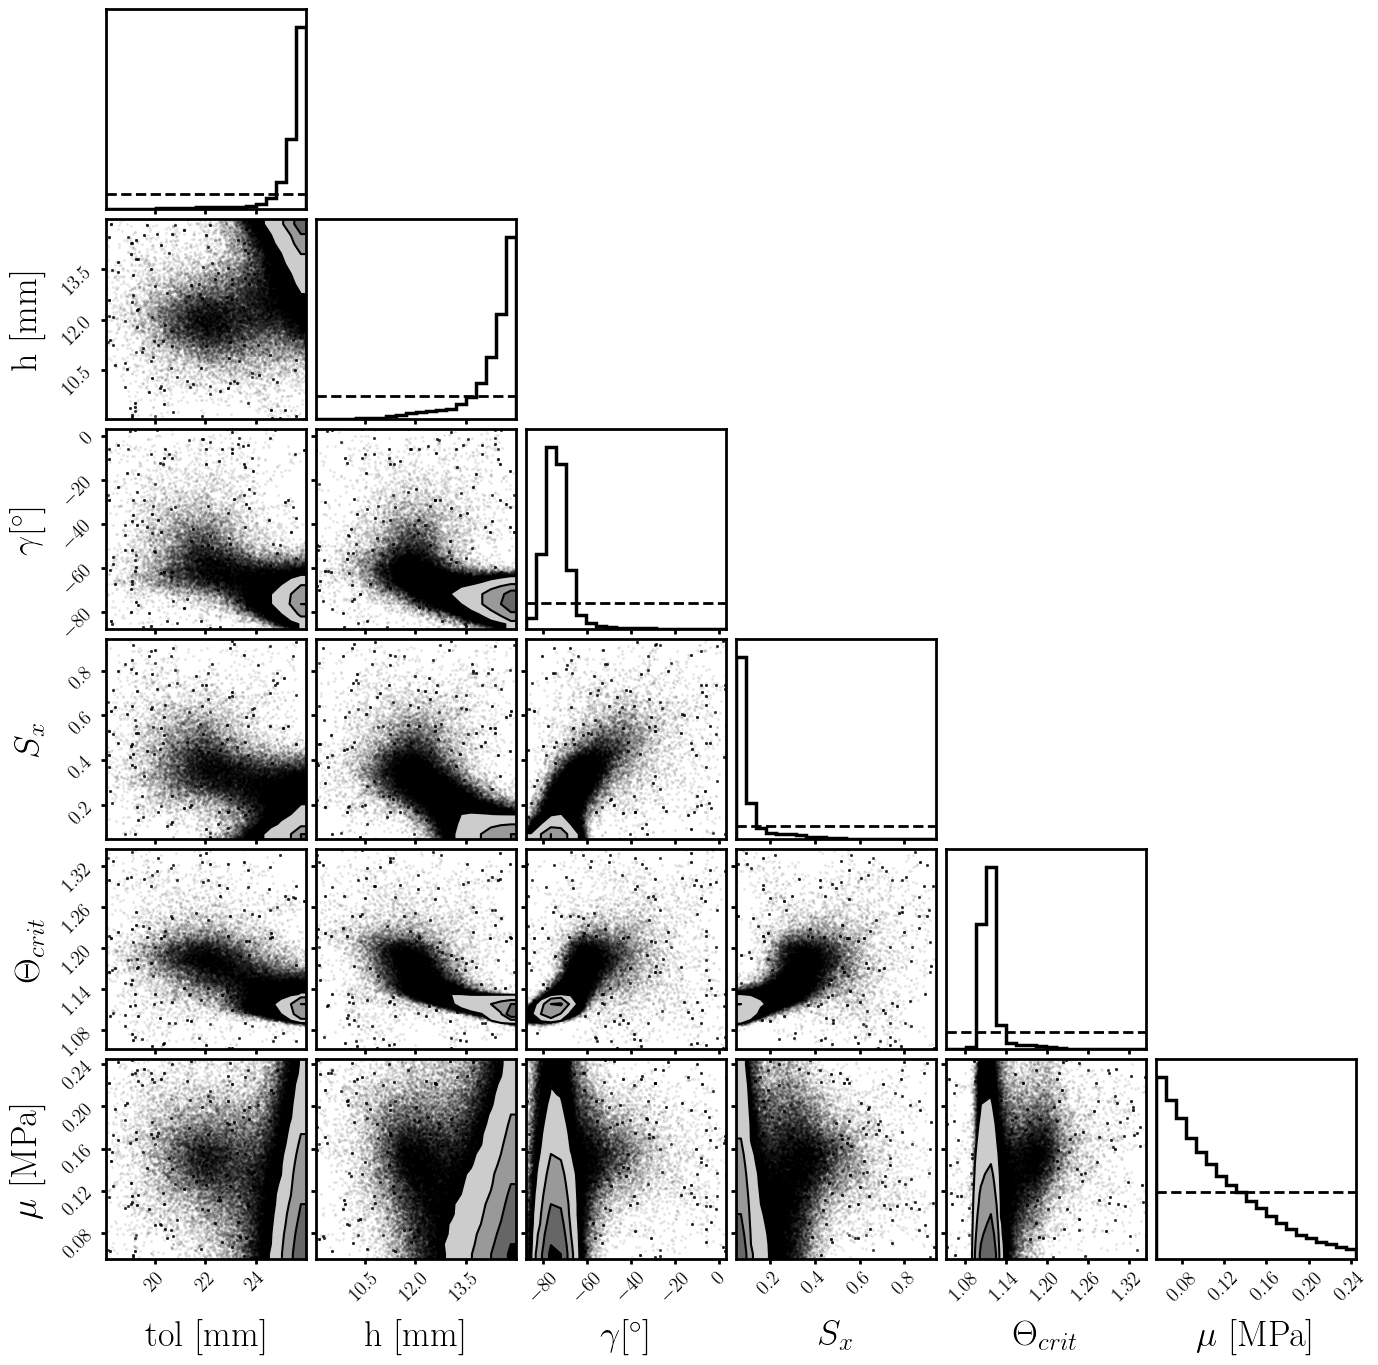

In [45]:
###Generate the well-formatted corner plot
prior_distributions = [tol_prior, h_prior, Gamma_prior, Sx_prior, Theta_crit_prior, mu_prior]


posterior_samples = samples

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)  # Adjust the size as needed
font_properties = {'weight': 'bold', 'size': 26}  # Adjust the size as needed

fig = corner.corner(posterior_samples, color= 'k', 
                    labels=["tol [mm]", "h [mm]","$\\gamma [^\circ]$", "$S_x$", "$\Theta^{{crit}}$", "$\mu$ [MPa]"], 
                    title_kwargs={"fontsize": 12}, fill_contours=True, 
                    label_kwargs={"fontsize": 26, "fontweight": "bold"}, 
                    hist_kwargs={'density': True, 'linewidth': 2.5})



# Define the prior distributions (this is just an example using normal distributions)
priors = [prior for prior in prior_distributions]

# Extract the axes from the corner plot
axes = np.array(fig.axes).reshape((6, 6))

print(priors[0].kwds['loc'])
# Overlay the priors on the diagonal subplots
for i in range(6):
    ax = axes[i, i]
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 1000)
    

    y = priors[i].pdf(x)

    # Plot the priors
    ax.plot(x, y, color='k', linestyle='--', linewidth=2.0)
    
axes = np.array(fig.axes).reshape((6, 6))  # Reshape axes into a 3x3 grid
for ax_row in axes:
    for ax in ax_row:
        for spine in ax.spines.values():
            spine.set_linewidth(2)  # Set the linewidth of each subplot's border
            # Set font properties for labels and ticks


# Apply the font properties to all text elements in the plot
for ax in fig.get_axes():
    ax.set_xlabel(ax.get_xlabel(), fontdict=font_properties)
    ax.set_ylabel(ax.get_ylabel(), fontdict=font_properties)
    ax.tick_params(axis='both', which='major', labelsize=28, width=2)  # Adjust the size as needed
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(14)  # Adjust the size as needed
        tick.set_fontweight('bold')

plt.savefig("P14_Sim_Posteriors.png", dpi=200)
# Show the plot
plt.show()

In [29]:
##########Predict Output Error from Samples##############
output_samples_error = []
n_samples = samples[:, 0:3].shape[0]
print(n_samples)
for i in range(n_samples):
    output_samples_error.append(gp_2.predict(samples[i, :].reshape(1, -1)))

420000


In [15]:
# Plot histogram
flat_samples_error = np.concatenate(output_samples_error)
plt.figure(figsize=(10, 6))
plt.hist(flat_samples_error, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=1.4699, color='red', linestyle='--', linewidth=2, label="Minimum Error from Simulations")
plt.axvline(x=1.4271916614143088, color='green', linestyle='--', linewidth=2, label="GP Minimum used during MCMC")

#Generate plot for posterior error
plt.legend()
plt.title('Histogram of Output Samples')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show plot
plt.show()

NameError: name 'output_samples_error' is not defined

In [33]:
output_samples = []
n_samples = samples[:, 0:3].shape[0]
print(n_samples)
for i in range(n_samples):
    #if gp_2.predict(samples[i,:].reshape(1, -1)) < 1.6:
    output_samples.append(gp_1.predict(samples[i, :].reshape(1, -1)))

420000


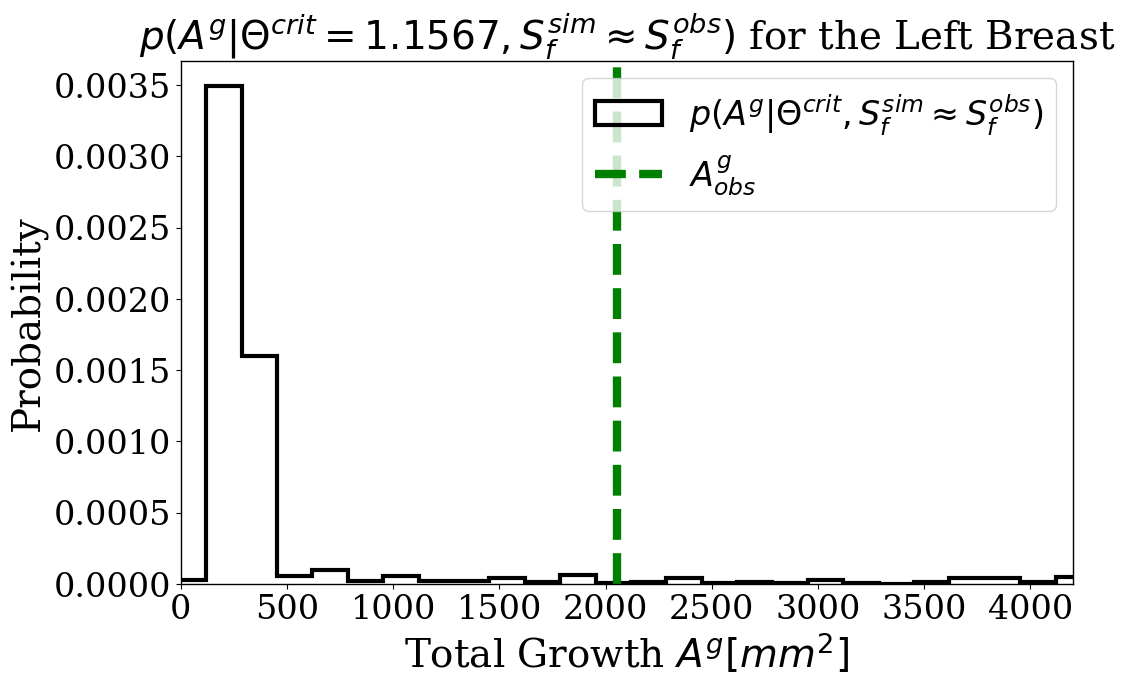

0.0


In [52]:
import latex
# Plot histogram
flat_samples = np.concatenate(output_samples)

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}"
})

ag_post = plt.figure(figsize=(10, 6))
plt.hist(flat_samples, bins=50, color='k', histtype='step', linewidth=3, density=True, label=r"$p(A^g_{obs}|A^g_{meas}, S_f^{sim} \approx S_f^{obs})$")
plt.axvline(x=2052.2, color='green', linestyle='--', linewidth=6, label="$A^g_{obs}$")

label_font_properties = {'fontsize': 16, 'fontweight': 'bold'}  # Increase the font size
tick_font_properties = {'fontsize': 8, 'fontweight': 'bold'}  # Increase the font size for ticks

    # Set the labels and title
plt.xlabel(label_font_properties)


    # Set the linewidth of the plot border
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)  # Set the desired linewidth

plt.tick_params(axis='both', which='major', labelsize=14)  # Major ticks
plt.tick_params(axis='both', which='minor', labelsize=10)  # Minor ticks (if present)

# Adjust layout for better spacing


plt.tight_layout()

# Add labels and title
#xticks = [2000,  2200,  2400, 2600, 2800,  3000, 3200, 3400, 3600,  3800,  4000,  4200]
#plt.xticks(ticks=xticks)
plt.xlim([0,4200])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.title(r'$p(A^g|\Theta^{crit}=1.1567, S_f^{sim} \approx S_f^{obs})$ for the Left Breast', fontsize=28)
plt.xlabel('Total Growth $A^g [mm^2]$', fontsize=28)
plt.ylabel('Probability', fontsize=28)

hist, bin_edges = np.histogram(flat_samples, bins=30, density=True)

# Show plot
plt.legend(fontsize=24)
plt.show()